# Data Science: Method for Data Analysis

## Ilana Zimmerman

## 1/10/2018

## Homework 1

Description: Load and explore the 'Jittered Headcount' data and come up with 3 takeaway summaries that are more insightful that simple summaries and would be hard or impossible to find on Excel-like software.

Data available here for download: https://www.dropbox.com/s/sx9ikvcjbrwuqyj/JitteredHeadCount.csv?dl=0

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
# Load data
headcount_df = pd.read_csv('JitteredHeadCount.csv')
headcount_df.describe()


,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
# Look at head
print(headcount_df.head(10))
print(headcount_df.shape)
print(headcount_df.dtypes)

  GameCode DateFormat  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
0       BA  9/16/2011     6          0           0             1          0   
1       BA  9/16/2011     7          0           0             1          0   
2       BA  9/16/2011     8          0           0             1          0   
3       BA  9/16/2011     9          0           0             1          0   
4       BA  9/16/2011    10          0           1             0          0   
5       BA  9/16/2011    11          0           1             0          0   
6       BA  9/16/2011    12          0           1             0          0   
7       BA  9/16/2011    13          0           1             0          0   
8       BA  9/16/2011    14          0           1             0          0   
9       BA  9/16/2011    15          0           1             0          0   

   DayOfWeek  DayNumber  
0          6         47  
1          6         47  
2          6         47  
3          6         47  


In [4]:
# Tell pandas about our date column
# For formatting info, check out: http://strftime.org/
headcount_df['DateFormat'] = pd.to_datetime(headcount_df['DateFormat'], format="%m/%d/%Y")
print(headcount_df.dtypes)

GameCode                object
DateFormat      datetime64[ns]
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
dtype: object


In [5]:
# Summarize by day and gametype
grouped_day_gt = headcount_df.groupby(['DateFormat', 'GameCode'])

# Custom aggregation
custom_aggregation = lambda g: np.sum(g==0)

aggregation_funs = {'TablesOcc':{'mean': np.mean,
                                 'zero_occ_hours': custom_aggregation},
                    'TablesClosed': ['mean'],
                    'HeadCount': ['mean', 'sum'],
                    'TablesOpen': ['mean']}
daily_hc_gt = grouped_day_gt.agg(aggregation_funs)

In [6]:
print(daily_hc_gt.head())
print('Size: {}'.format(daily_hc_gt.shape))
daily_hc_gt.describe()

                    TablesClosed TablesOpen  HeadCount           TablesOcc  \
                            mean       mean       mean  sum zero_occ_hours   
DateFormat GameCode                                                          
2011-08-01 C4           0.375000   0.625000   2.500000   60              9   
           CR           3.541667   2.458333  16.041667  385              0   
           DH           2.500000   3.500000   7.916667  190              2   
           FP           2.000000   3.000000  11.208333  269              1   
           LI           1.291667   2.708333   7.791667  187              3   

                               
                         mean  
DateFormat GameCode            
2011-08-01 C4        0.625000  
           CR        2.250000  
           DH        2.625000  
           FP        2.708333  
           LI        2.125000  
Size: (7328, 6)


TablesClosed   TablesOpen    HeadCount                   TablesOcc  \
              mean         mean         mean          sum zero_occ_hours   
count  7328.000000  7328.000000  7328.000000  7328.000000    7328.000000   
mean      1.852942     2.555014     7.387741   177.168805       7.688865   
std       2.247508     3.095258     9.676418   232.087731       7.610741   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.333333     0.666667     1.291667    31.000000       1.000000   
50%       0.958333     1.250000     3.583333    86.000000       5.000000   
75%       2.666667     3.250000     9.416667   226.000000      14.000000   
max      14.208333    20.333333    73.333333  1760.000000      24.000000   

                    
              mean  
count  7328.000000  
mean      2.073927  
std       2.681701  
min       0.000000  
25%       0.458333  
50%       0.958333  
75%       2.708333  
max      17.708333

In [7]:
# Summarize by day!
grouped = headcount_df.groupby('DateFormat')

aggregation_funs = {'TablesOcc':['mean'],
                    'TablesClosed': ['mean'],
                    'HeadCount': ['mean', 'sum'],
                    'TablesOpen': {'mean': np.mean}}

daily_headcount = grouped.agg(aggregation_funs)


In [8]:
print(daily_headcount.head())
daily_headcount.describe()

           TablesClosed TablesOpen HeadCount       TablesOcc
                   mean       mean      mean   sum      mean
DateFormat                                                  
2011-08-01     2.222917   2.177083  6.672917  3203  1.843750
2011-08-02     2.358333   2.041667  6.108333  2932  1.747917
2011-08-03     2.393750   2.006250  5.500000  2640  1.660417
2011-08-04     2.327083   2.072917  5.833333  2800  1.741667
2011-08-05     1.737500   2.662500  7.122917  3419  2.100000


TablesClosed  TablesOpen   HeadCount                TablesOcc
              mean        mean        mean          sum        mean
count   366.000000  366.000000  366.000000   366.000000  366.000000
mean      1.853588    2.555838    7.390345  3547.248634    2.074626
std       0.473046    0.479766    1.782306   855.911557    0.416316
min       0.631250    1.347917    3.714583  1783.000000    1.095833
25%       1.453312    2.127604    5.985938  2873.250000    1.733854
50%       1.975000    2.448958    7.079167  3387.500000    1.986458
75%       2.269271    2.952083    8.788021  4218.250000    2.430729
max       3.052083    3.868750   13.929167  6686.000000    3.189583

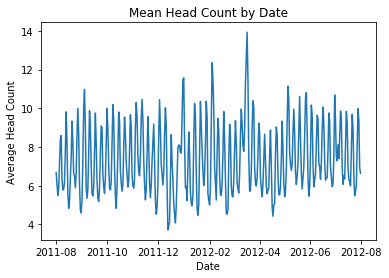

In [9]:
# Plot the avg. daily headcount by day
%matplotlib inline
plt.plot(daily_headcount['HeadCount']['mean']) # Automatically uses the dataframe's index - which is the date!
plt.title('Mean Head Count by Date')
plt.xlabel('Date')
plt.ylabel('Average Head Count')
plt.show()

The average head count at the casino has an obvious spike during 'March Madness'. The average head counts noted, however, have been lowered significantly by all of the zero head count lines of data. 

In [10]:
#Count How many unique game types are in the dataframe
pd.Series.value_counts(headcount_df['GameCode'])

C4    8778
RO    8778
TH    8778
MR    8778
SH    8778
FP    8778
UT    8778
PG    8778
PA    8778
ND    8778
MQ    8778
S6    8778
CR    8778
LI    8778
RR    8778
TP    8778
DH    8778
WR    8778
TL    8778
MI    8630
MS     147
BA     118
Name: GameCode, dtype: int64

As shown by the counts above, Baccarat and Mississippi Stud show significantly less instances recorded at the casino. This does not necessarily mean they are the least popular games as they could have higher head counts than any other game. This will be explored further below.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


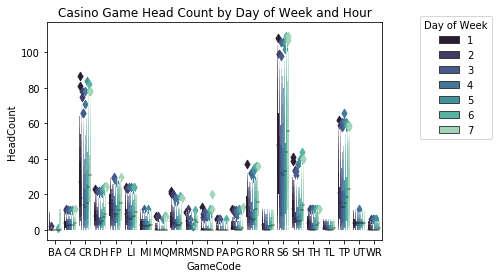

In [11]:
import seaborn as sns
sns.lvplot(hue=headcount_df['DayOfWeek'],x =headcount_df['GameCode'], y =headcount_df['HeadCount']
           , scale="linear", palette="mako")
plt.title('Casino Game Head Count by Day of Week and Hour')
plt.xlabel= 'Day of Week'  #These labels with spaces will not replace dataframe column label...not sure why
plt.ylabel = 'Head Count'
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05), title='Day of Week')

In the graph above, we can now determine which games are the most and least popular using the head count data. Baccarat is in fact the game with the least head counts, followed by 'TH' or one of the seven 'Black Jack Variants' noted. The most popular games are Big Six, followed by Craps, then Texas Hold'em Poker. Note that the head counts here are not normalized by the number of data points available or when the data was taken (peak hour versus 6AM). 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0     5
1     5
2     5
3     5
4     4
5     4
6     5
7     5
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    5
21    5
22    5
23    5
Name: Hour, dtype: int64

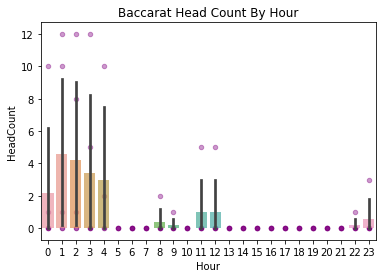

In [12]:
df_BA = headcount_df[headcount_df['GameCode']=='BA']
sns.barplot(df_BA['Hour'],df_BA['HeadCount'], alpha = 0.7)
plt.scatter(df_BA['Hour'], df_BA['HeadCount'], s=20 #superimpose bubble scatter plot on barchart with low opacity bubbles to show density reccuring instances.
            , c="purple", alpha=0.4)
plt.title('Baccarat Head Count By Hour')

pd.Series.value_counts(df_BA['Hour'], sort=False) #count number of data points for Baccarat at each hour of the day


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


23    366
4     366
16    366
1     366
9     366
17    366
10    366
18    366
3     366
11    366
15    366
19    366
12    366
20    366
5     366
13    366
21    366
14    366
22    366
0     366
7     365
8     365
2     364
6     364
Name: Hour, dtype: int64

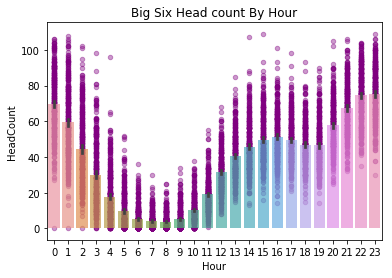

In [13]:
df_S6 = headcount_df[headcount_df['GameCode']=='S6']
sns.barplot(df_S6['Hour'],df_S6['HeadCount'], alpha= 0.7)
plt.scatter(df_S6['Hour'], df_S6['HeadCount'], s=20
            , c="purple", alpha=0.4)
plt.title('Big Six Head count By Hour')

pd.Series.value_counts(df_S6['Hour']) #How many data points were taken for Big Six at each hour of the day?


Exploring the most and least popular casino games further, we can see that the data set does have an even amount of data points for the two games at each hour of the day. This means we can in fact extrapolate popularity from this dataset. Baccarat was most popular at 1AM with a head count of 5, whereas Big Six was most popular between 10PM and 12AM with a headcount around 70 people. That said, we cannot tell if the same people are staying to play the entire 3 hours or if there is high turn over of new people circulating in. To get that level of detail is would be helpful to assign unique identifiers to each player. 

In [14]:
df_zero_headcountS6=df_S6[df_S6['HeadCount']==0]#create dataframe for Big Six with zero head count
pd.Series.value_counts(df_zero_headcountS6['Hour'], sort=False, normalize=True)#display normalized distribution of hour of day with zero head count

0     0.001543
1     0.001543
2     0.001543
3     0.004630
4     0.023148
5     0.091049
6     0.175926
7     0.211420
8     0.239198
9     0.200617
10    0.049383
Name: Hour, dtype: float64

The above data shows that the least popular time (zero head count) to be at the casino for the most popular game (Big Six) is between 6AM and 9AM.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


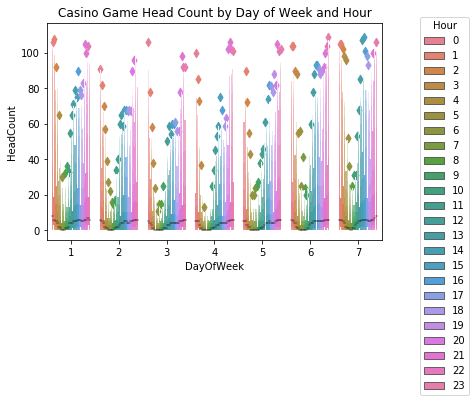

In [15]:
sns.lvplot(x=headcount_df['DayOfWeek'],y =headcount_df['HeadCount'], 
           hue = headcount_df['Hour'], scale="linear", palette="husl")
plt.title('Casino Game Head Count by Day of Week and Hour')
plt.xlabel= 'Day of Week'  #These labels with spaces will not replace dataframe column label...not sure why
plt.ylabel = 'Head Count'
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05), title='Hour')


As shown in the colorful Seaborn plot above, the relative head count by hour does not change too dirastically by day of the week. As expected, the most popular hours to go to the casino are between 8pm and 1AM.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


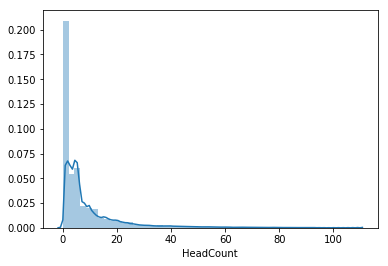

In [16]:

sns.distplot(headcount_df['HeadCount'])

#Distribution of Head Count

The distribution plot of head count data displayed above shows that 20% of data points have a head count of zero, followed next by a head count just below 10 at ~7% frequency. This information could be much more informative if the head count per game type were normalized first, because, as shown above certain games are much more popular than others. 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Number of Tables Occupied')

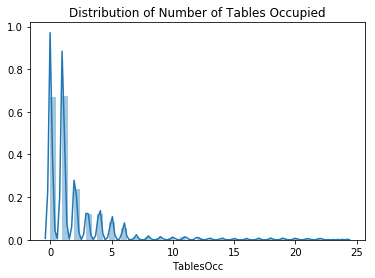

In [17]:
sns.distplot(headcount_df['TablesOcc'])
#plt.xlabel('Number of Tables Occupied')
plt.title('Distribution of Number of Tables Occupied')

TypeError: 'str' object is not callable

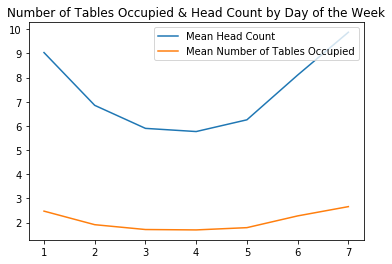

In [18]:
grouped_Day = headcount_df.groupby('DayOfWeek')

aggregation_funs = {'TablesOcc':['mean'],
                    'TablesClosed': ['mean'],
                    'HeadCount': ['mean', 'sum'],
                    'TablesOpen': {'mean': np.mean}}

daily_headcount2 = grouped_Day.agg(aggregation_funs)
plt.plot(daily_headcount2['HeadCount']['mean'], label = 'Mean Head Count')
plt.plot(daily_headcount2['TablesOcc']['mean'], label = 'Mean Number of Tables Occupied')
plt.title('Number of Tables Occupied & Head Count by Day of the Week')
plt.legend(loc='upper right')
plt.ylabel('Count') # I keep getting error "'str' object not callable" when trying to label my axes...why?
plt.xlabel('Day of the Week')


The graph above shows the correlation beween the day of the week, number of tables occupied, and head count. As expected, head count and number of tables occupied are highly correlated. Also as expected, Fridays and Saturdays show much higher attendence than weekdays.

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 10)

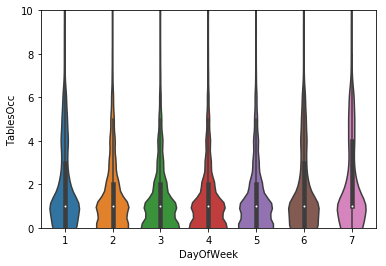

In [19]:

sns.violinplot( headcount_df['DayOfWeek'],headcount_df['TablesOcc'])
axes = plt.gca()
axes.set_ylim([0,10]) #lower y axis limit to more easily visualize number of tables occupied density difference 


The violin plot above shows the relative density of data points of the number of tables occupied by day of the week. This representation is less intuitive, but shows that there are more tables occupied days 1, 6, and 7 than on other days of the week.